This code loads the dataset, removes the % symbol from the 'Headshot %' column and selects the features to use for clustering. Then, it uses the KMeans clustering algorithm to determine the optimal number of clusters by plotting the elbow curve.

The elbow curve helps to identify the optimal number of clusters by plotting the sum of squared errors (SSE) for each number of clusters. The optimal number of clusters is usually where the SSE starts to level off or plateau.

The KMeans algorithm is used to perform clustering by trying to minimize the SSE. It partitions the data into K clusters, where K is the number of clusters specified. The algorithm starts by randomly initializing K centroids, then assigns each data point to the nearest centroid, and finally, it re-computes the centroid of each cluster based on the assigned data points.

The kmeans_kwargs dictionary specifies the parameters to use for the KMeans algorithm. init specifies the method for initialization, n_init specifies the number of times the algorithm will be run with different centroid seeds, max_iter specifies the maximum number of iterations for each run, and random_state specifies the seed for the random number generator.

The sse list stores the SSE for each number of clusters, and the for loop runs the KMeans algorithm for each value of K from 1 to 10. The SSE for each value of K is appended to the sse list, and the elbow curve is plotted using Matplotlib. The plt.style.use function sets the style of the plot to 'fivethirtyeight', which is a popular style used in data visualization. The plt.plot, plt.xticks, plt.xlabel, and plt.ylabel functions are used to customize the plot. Finally, the plt.show function is used to display the plot.

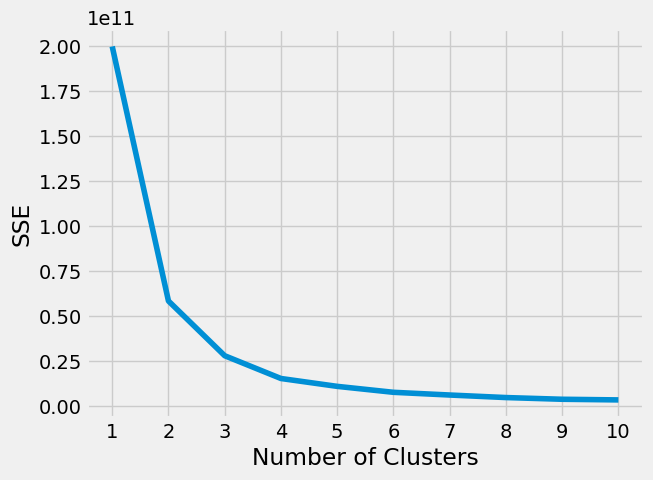

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('Updated_Scrape_Data.csv')

# remove the '%' symbol from the 'Headshot %' column
data['Headshot %'] = data['Headshot %'].str.rstrip('%').astype('float') / 100.0

# Select the features to use for clustering
features = ['Total Kills', 'Headshot %', 'Total Deaths', 'K/D Ratio', 'Damage / Round', 'Greande Damage / Round', 'Maps Played', 'Rounds Played', 'Kills / Round', 'Assists / Round', 'Deaths / Round', 'Saved by Teammates / Round', 'Saved Teammates / Round', 'Rating']

# Select the columns for clustering
X = data[features]

# determine the optimal number of clusters
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# plot the elbow curve to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

This code will perform KMeans clustering with k=4, add the cluster labels to the original dataframe, and generate a scatter plot colored by the cluster number. The scatter plot will have 'Total Kills' on the x-axis and 'Headshot %' on the y-axis.

c:\Users\arghy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


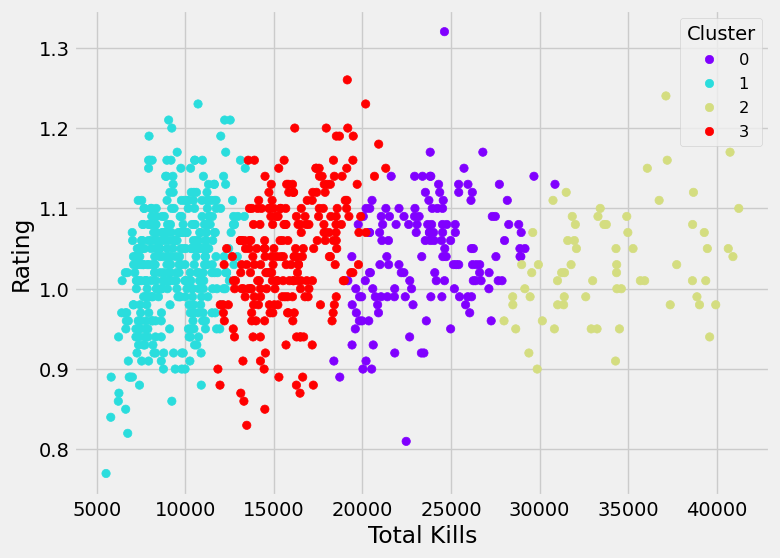

In [65]:
# Perform clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the original dataframe
data['Cluster'] = kmeans.labels_

# Sort the dataframe by cluster number
data = data.sort_values(by=['Cluster'])

# save the results to a new file
data.to_csv('Clustered_Data.csv', index=False)

# Generate a scatter plot colored by cluster number
fig, ax = plt.subplots(figsize=(8,6))
scatter = plt.scatter(x=data['Total Kills'], y=data['Rating'], c=data['Cluster'], cmap='rainbow')
ax.set_xlabel('Total Kills')
ax.set_ylabel('Rating')
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right", fontsize='small')
plt.show()

We tried multiple clustering algorithms for the task: K-means, DBSCAN, Hierarchical clustering & Spectral clustering.

Among these, K-Means gave the most distinguished and non-overlapping clusters. Hence, we finalise it as our clustering method.


There might be several reasons why K-Means might have given the most distinguished and non-overlapping clusters:

i) K-Means is a simple and efficient algorithm that is easy to implement and understand. It works well when the clusters are well-separated and evenly sized.

ii) K-Means assumes that the data is normally distributed and that the clusters are spherical, which is often the case in practice. This makes it a good choice for many real-world datasets.

iii) K-Means is a centroid-based algorithm, which means that it tries to find the center of each cluster and assigns data points to the closest center. This results in well-separated clusters, as opposed to other algorithms that may result in overlapping or non-convex clusters.

iv) K-Means allows for easy interpretation of the results. Each cluster is represented by its centroid, which can be used to summarize the characteristics of the data in that cluster.

Our analysis can help teams to find better replacements for their team based on player characteristics/playing patterns by choosing another player in the same cluster.